In [1]:
! cta-data get cta/users/gitlab_ctao_volodymyr_savchenko//reports --recursive

import glob

In [13]:
import json

d = []
for j in glob.glob('cta/users/gitlab_ctao_volodymyr_savchenko/reports/noir/*.json'):
    d.append(json.load(open(j)))

[]

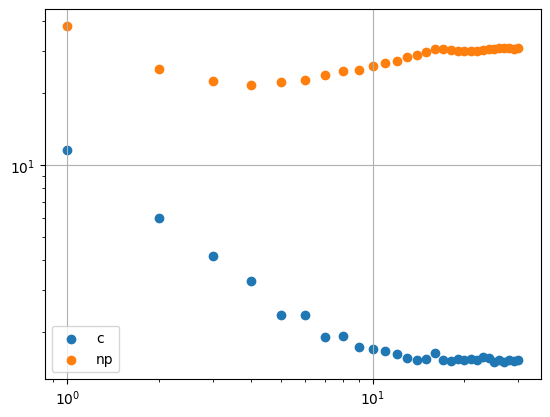

In [18]:
from matplotlib import pyplot as plt

for version in ['c', 'np']:
    plt.scatter(
        [i['nproc'] for i in d if i['version'] == version], 
        [i['total_time'] for i in d if i['version'] == version],
        label=version
    )

plt.legend()

plt.grid()

plt.loglog()